In [1]:
### COMPUTATIONAL PHYSICS
### Final, Problem 3: Lightbulb Efficiency

# An incandescent light bulb is a simple device—it contains a resistive filament, 
# usually made of tungsten, heated by the flow of electricity until it becomes hot enough 
# to radiate thermally. Essentially all of the power consumed by such a bulb is radiated 
# as electromagnetic energy, but some of the radiation is not in the desired wavelengths, 
# which means it is useless for desired lighting purposes.

# Let us define the efficiency of a light bulb to be the fraction of the radiated energy that 
# falls in a specific band. It’s a good approximation to assume that the radiation obeys the 
# Planck radiation law, meaning that the power radiated per unit wavelength λ obeys a given
# equation where A is the surface area of the filament, T is the temperature, h is Planck’s constant,
# c is the speed of light, and kB is Boltzmann’s constant. For a specific use, the desired wavelengths
# run from λ1 = 450 nm to λ2 = 750 nm.

### Name:  Carson Huey-You


In [2]:
### 1. IMPORT PACKAGES

import math as math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scipy_int


In [3]:
### 2. DEFINE FUNCTIONS

# Define a function for the integrand.

def func(x):
    return (x**3)/(np.e**x - 1)



In [4]:
### 2. DEFINE FUNCTIONS

# Define a function to find the efficiency.

def efficiency(temp):
    
    #Band of wavelengths
    wavelength_band = [450e-9, 750e-9]#m
    
    #Constants
    hc = 1.986e-25 #Plancks constant * speed of light = [Js·m/s] = [J·m]
    k = 1.381e-23 #Boltzmanns constant = [J/K]
    
    #Integration limits after change of variables
    xmax = hc/(wavelength_band[0]*k*temp)
    xmin = hc/(wavelength_band[1]*k*temp)
    
    x = np.linspace(xmin, xmax, 5000)
    
    #Simpsons Integration
    int_simpsons = scipy_int.simps(func(x), x=x)
    
    return (15/np.pi**4)*int_simpsons
    

In [5]:
### 3. CREATE ARRAYS AND FIND OPTIMAL EFFICIENCY

#Array of Temperatures.
T = np.linspace(300, 10000, 5000)

#Array of Efficiencies, at each Temperature.
efficiency_arr = np.empty( shape = len(T) )
for i in range(0, len(T)):
    efficiency_arr[i] = efficiency(T[i])
    
#Find Optimal Efficiency.
optimal_eff = max(efficiency_arr)

#Find Optimal Temperature.
mask = (efficiency_arr == optimal_eff)
optimal_T = T[mask][0]



In [6]:
#Example calculations for special temperatures, explained later.

for temp in [3695, 5828, 6203, optimal_T]:
    
    eff = efficiency(temp)
    
    state = f"{round(eff*100, 2)}% Efficiency at {temp}K"
    print(state)


19.66% Efficiency at 3695K
35.61% Efficiency at 5828K
36.09% Efficiency at 6203K
36.15% Efficiency at 6394.758951790358K


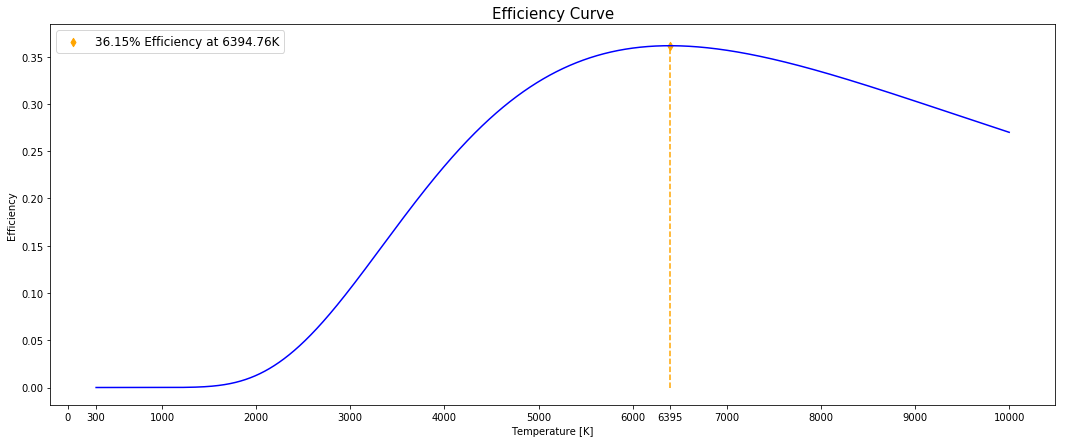

In [7]:
### 4. CREATE PLOT TO SHOW EFFICIENCY CURVE.

#Test plot, to show efficiency.

fig = plt.figure(figsize=(18,7))
plt.title(f"Efficiency Curve", size=15)
plt.xlabel("Temperature [K]")
plt.ylabel("Efficiency")

plt.plot(T, efficiency_arr, color='blue')

#Set proper label.
label = f"{round(efficiency(optimal_T)*100, 2)}% Efficiency at {round(optimal_T, 2)}K"

plt.plot([optimal_T, optimal_T], [0, efficiency(optimal_T)], color='orange', linestyle='--')
plt.scatter(optimal_T, efficiency(optimal_T), s=35, color='orange', marker='d', label=label)

#Set xticks.
xticks = np.linspace(0, 10000, 11)
xticks = np.append(xticks, optimal_T)
xticks = np.append(xticks, 300)
plt.xticks(xticks)

#Set legend and show plot.
plt.legend(loc='upper left', prop={'size': 12})
plt.show()


In [8]:
### 5. ANSWER FOR PART 3B.

# It is completely impractical to run a W-filament lightbulb at this
# temperature.  For reference, tungsten has properties of:

# 19.66% Efficiency at 3695K (Melting Point)
# 35.61% Efficiency at 5828K (Boiling Point 1)
# 36.09% Efficiency at 6203K (Boiling Point 2)
# 36.15% Efficiency at 6395K (Peak Efficiency)

# There were two different estimated 'boiling points' found.
# Boiling Point 1 from an entry in the Journal of Chemical & Engineering Data.
# Boiling Point 2 from Wolfram Alpha.
# Both sources agreed on the melting point value.

# Compare this to the peak efficiency observed at 6395K.  At this
# point, the tungsten filament would simply boil.  Even at this peak, 
# the efficiency turns out to only be roughly 36%.
